### Import

In [ ]:
import sys

sys.path.append('../')
sys.path.append('../ride/')

from ride_pfa import graph_osm_loader
import ride_pfa.centroid_graph.centroids_graph_builder as cgb
import ride_pfa.path_finding as pfa 
import ride_pfa.clustering as cls
import ride_pfa.drawer as dw
import ride_pfa.utils as utils
import matplotlib.pyplot as plt

### Graph download

In [2]:
id = graph_osm_loader.osm_cities_example['Paris']
g = graph_osm_loader.get_graph(id)

### Extraction Path Finding

In [ ]:
# To decrease error in pathfinding better to use inverse weight in Louvain 
utils.add_inverse_edges_weight(g, weight='length', inverse_weight='inverse')

In [ ]:
cms_resolver = cls.LouvainKMeansCommunityResolver(resolution=1, weight='inverse', k_means_weight='length')
cg_builder = cgb.CentroidGraphBuilder()

def build_and_get_time() -> tuple[float, cgb.CentroidGraph]:
    return utils.get_execution_time(lambda: cg_builder.build(g, cms_resolver), iterations=1)


t, cg = build_and_get_time()
t, len(cg.cms)

In [4]:
baseline = pfa.Dijkstra(g)

In [5]:
test_alg = pfa.ExtractionPfa(
    g = g,
    upper=pfa.Dijkstra(cg.g),
    down=pfa.Dijkstra(g),
    cluster='cluster'
)

In [22]:
nodes = list(g.nodes())
s,t = nodes[0], nodes[15]

l,p = baseline.find_path(s,t)
extraction_l, extraction_p = test_alg.find_path(s,t)

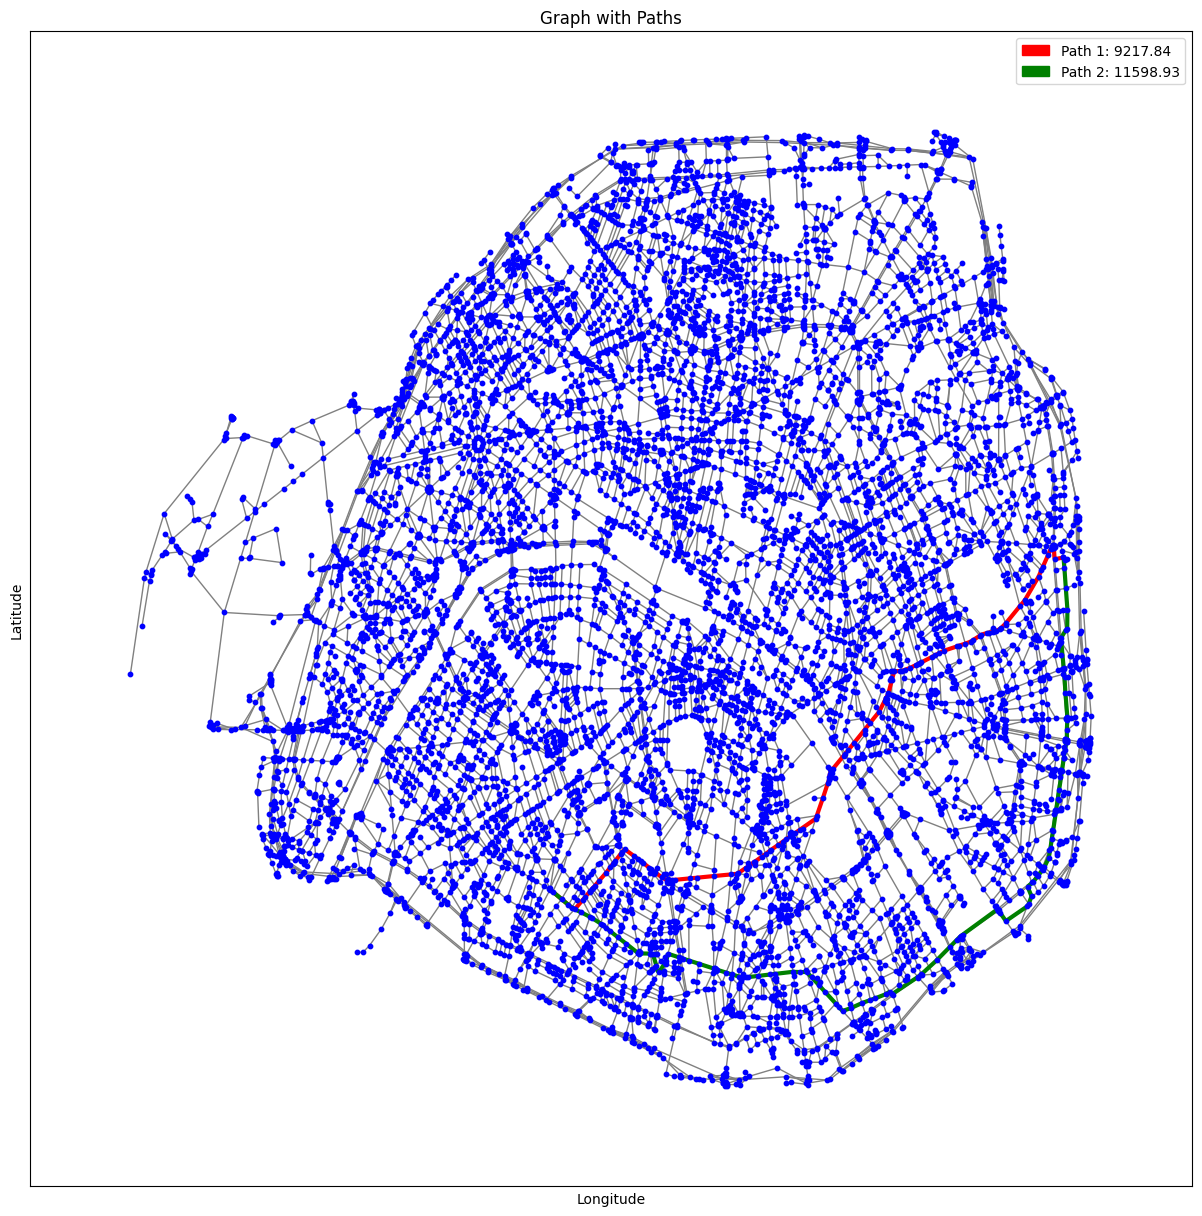

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))

paths = [
    (p, 'red'),            
    (extraction_p, 'green')
]

dw.draw_paths_matplotlib(g, paths, ax=ax)
plt.show()

In [16]:
m = dw.draw_graph_folium(g)
m = dw.draw_path_folium(g, p, m=m)
m = dw.draw_path_folium(g, extraction_p, m=m, color='green')

In [ ]:
m.show_in_browser()

### Heuristic Path Finding

In [18]:
test_alg = pfa.MinClusterDistanceBuilder(
    workers=2
).build_astar(g, cms_resolver)

  0%|          | 0/2 [00:00<?, ?it/s]

In [24]:
l,p = baseline.find_path(s,t)
heuristic_l, heuristic_p = test_alg.find_path(s,t)

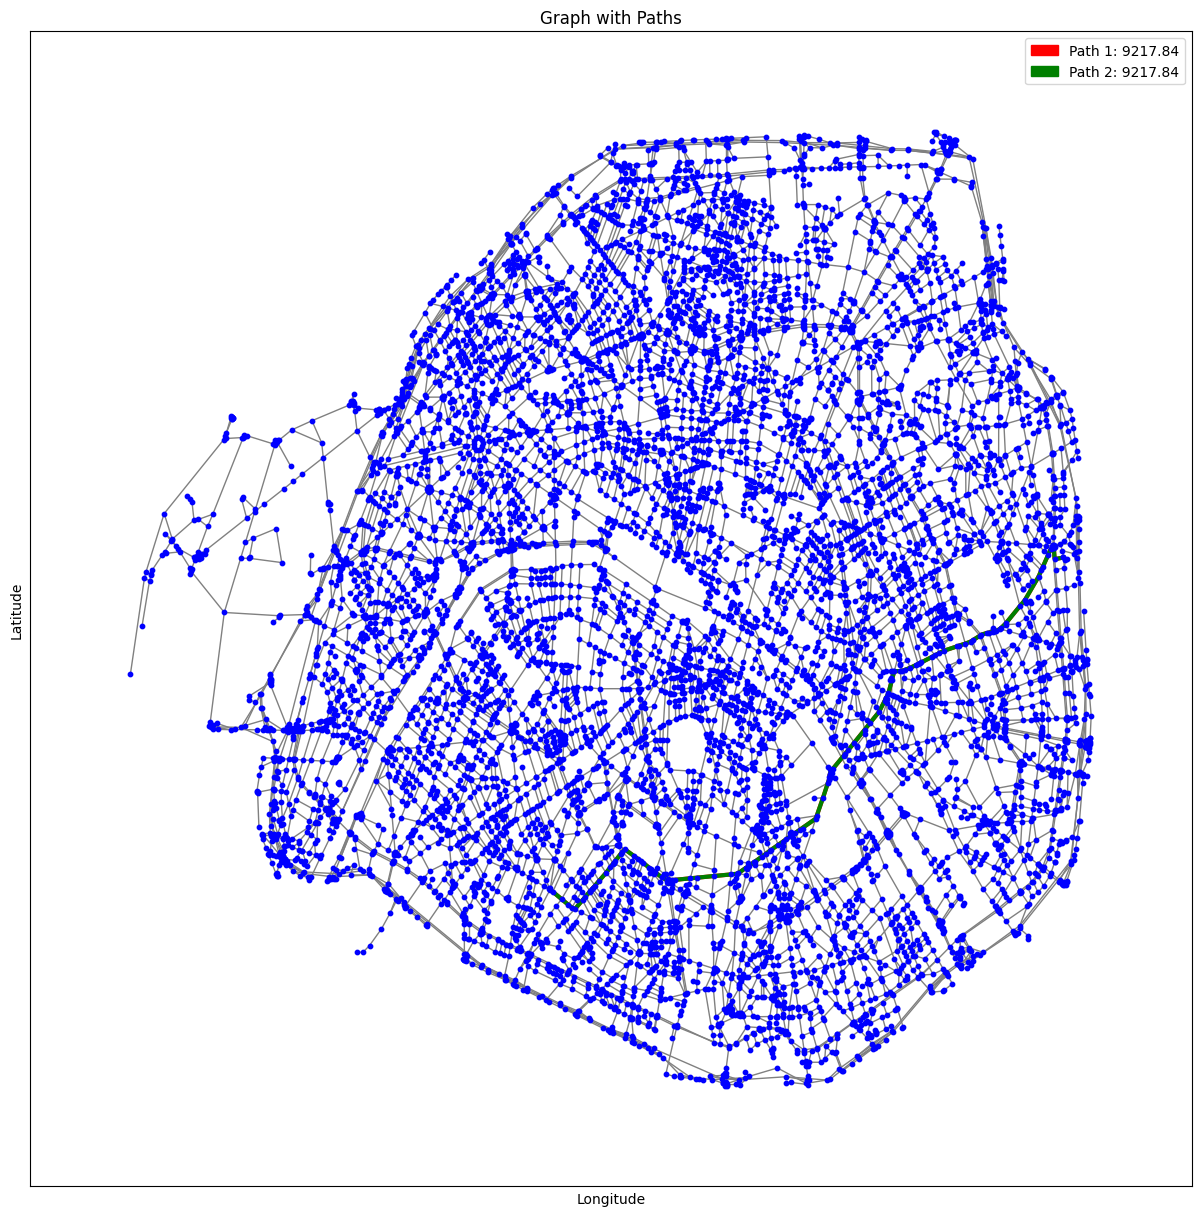

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))

paths = [
    (p, 'red'),            
    (heuristic_p, 'green')
]

dw.draw_paths_matplotlib(g, paths, ax=ax)
plt.show()